# Data Science 325

## Clustering

### Learning Objectives:

* Students will learn the motivation for classification techniques.
* Students will be exposed to two algorithmic approaches to classification: SVM and kNN
* Students will practice the application of these techniques and visualize their results

The goal of this week's project is to build simple classifiers that can be trained from data. In particular, you will implement a K-nearest-neighbor classifier, Support vector machine and Naive Bayes classifier. 

## load libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.svm import SVC                        #SVM "Support vector classifier"
from sklearn import naive_bayes                    #naive bayes classifier
import seaborn as sns; 
sns.axes_style("whitegrid")
sns.set_context("paper")
np.random.seed(0)
plt.style.use('seaborn')

### Data Set Information:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link]

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T), a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

[https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

In [46]:
#Loading Data set
web_addr = 'http://public.gettysburg.edu/~jpuckett/ds325/data/'
df = pd.read_csv(web_addr+"breast_cancer_dataset.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Attribute Information:
0) id 
1) Diagnosis (M = malignant, B = benign), we will convert this into (Malignant) = 1 and B (Benign) = 0

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)


In [47]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Check for null / nan. We do not have missing values, Great!

In [48]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

drop useless data

In [49]:
df.drop('id', axis = 1, inplace = True)
df.drop('Unnamed: 32', axis = 1, inplace = True)

Check how many counts for each class.

In [50]:
df['diagnosis'].value_counts().to_frame()

,diagnosis
B,357
M,212


**Encode the target 'diagnosis'.**

You can use something like:


<code>def diagnosis_value(diagnosis):
    if diagnosis == 'M':
        return 1
    else:
        return 0
df['diagnosis'] = df['diagnosis'].apply(diagnosis_value)
</code>

Probably better to use built-in functions like below:


In [51]:
y = df['diagnosis']
le = LabelEncoder()
le.fit(y)
classes = le.classes_
y_enc=le.transform(y)
df['diagnosis_enc'] = le.transform(y) #now 1=M; 0=B

In [52]:
# encoded corresponding to position of classes
le.classes_

array(['B', 'M'], dtype=object)

In [53]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_enc
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


### split our dataset into mean and worst and a small 

In [54]:
df_mean = df[['radius_mean',  'perimeter_mean', 'area_mean', 'smoothness_mean','texture_mean',
               'compactness_mean','concavity_mean', 'symmetry_mean','fractal_dimension_mean','diagnosis_enc']]

### Correlations: 
View Heat map

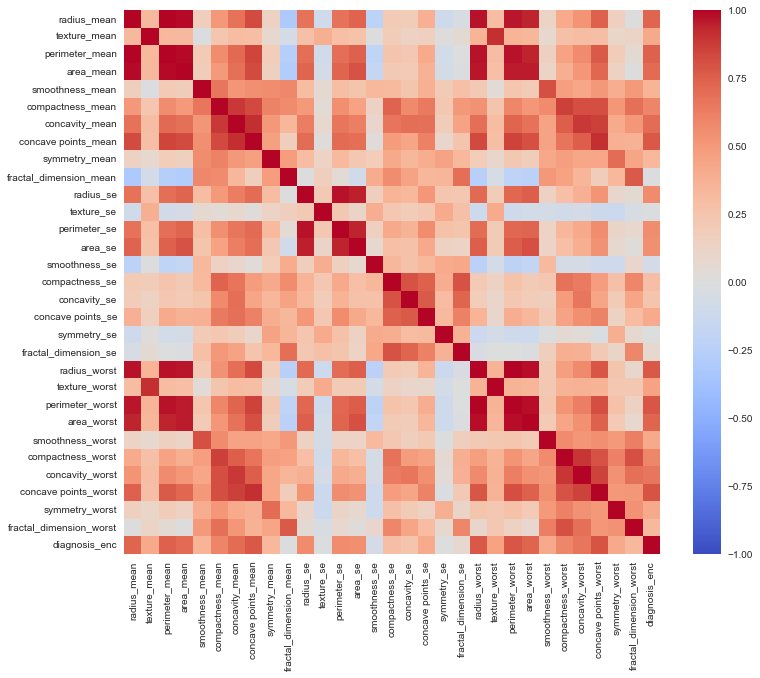

In [55]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=False, vmin=-1, vmax=1,cmap ="coolwarm");  # seaborn has very simple solution for heatmap

mean only correlations

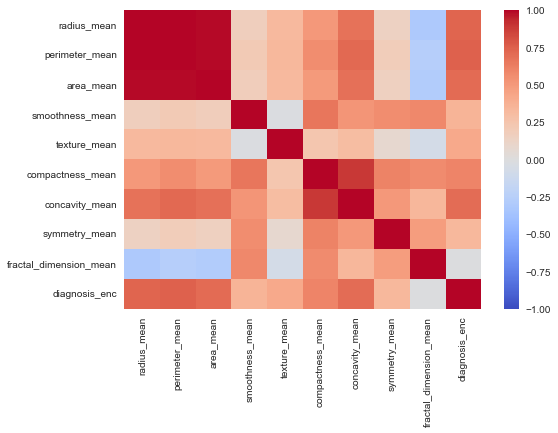

In [56]:
sns.heatmap(df_mean.corr(), annot=False, vmin=-1, vmax=1,cmap ="coolwarm");

### view distribution of variables

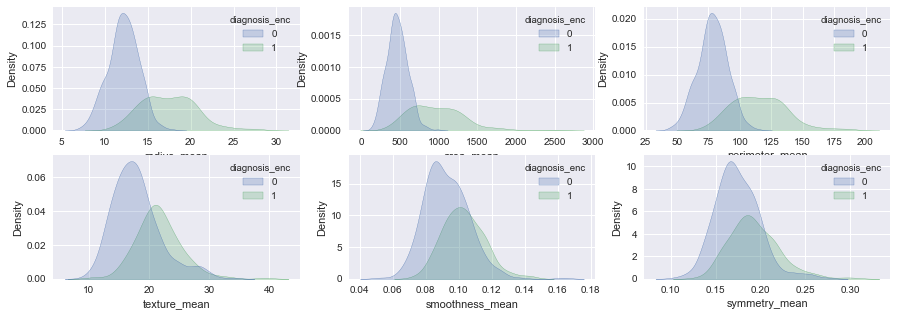

In [57]:
col_var = ["radius_mean","area_mean","perimeter_mean","texture_mean","smoothness_mean","symmetry_mean"] 
ncols = 3
fig, axs = plt.subplots(nrows=2, ncols=ncols, figsize=(15, 5))
axs = axs.flatten()
for i in range(len(col_var)):
    plt.sca(axs[i])
    sns.kdeplot(data=df_mean, x=col_var[i],hue='diagnosis_enc',shade=True)
plt.show()

#### Skewness
* A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

* A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.


##### to learn more about skewness
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/

### Feature Selection/Feature Engineering
We are just going to focus on **df_mean** which contains only the mean of the radius, perimeter, area, smoothness, texture. 

We can see a strong correlation between some features such as **radius** & **area**, we can easily remove one of them. Since, the **radius_mean** has a more correlation with the target varaible (**diagnosis**), we keep it.

Also we can see a strong correlation between two features (**perimeter_mean**, **radius_mean**) and they are another twins. Therfore we can remove radius_mean.  

While not as clear, **compactness_mean** and **concavity_mean** are also highly correlated.  We'll remove concavity_mean as well.

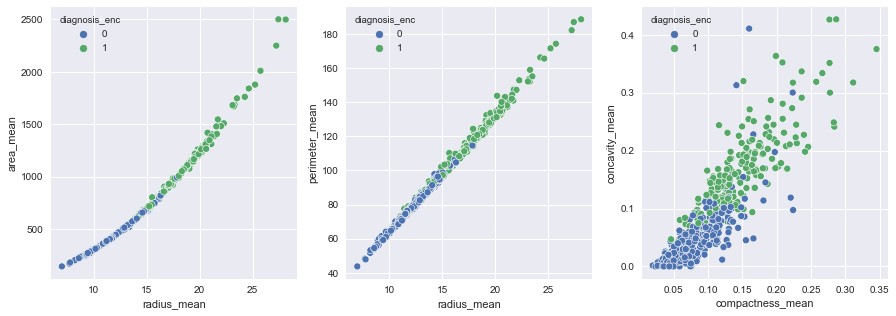

In [58]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
plt.sca(axs[0])
sns.scatterplot(x = 'radius_mean', y = 'area_mean', hue = 'diagnosis_enc', data = df_mean)
plt.sca(axs[1])
sns.scatterplot(x = 'radius_mean', y = 'perimeter_mean', hue = 'diagnosis_enc', data = df_mean)
plt.sca(axs[2])
sns.scatterplot(x = 'compactness_mean', y = 'concavity_mean', hue = 'diagnosis_enc', data = df_mean)
plt.show()

#### Uncorrelated features

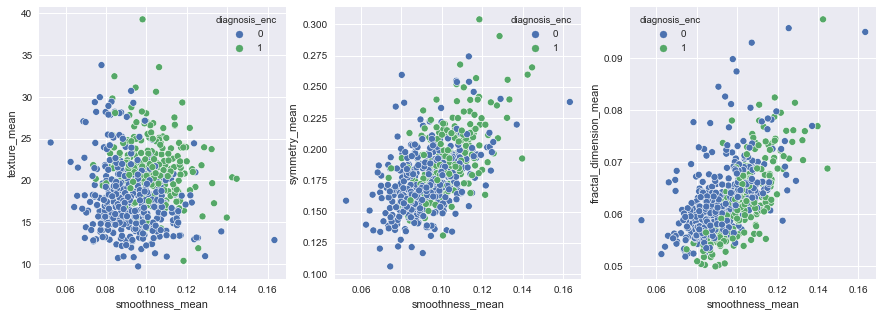

In [59]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
plt.sca(axs[0])
sns.scatterplot(x = 'smoothness_mean', y = 'texture_mean', hue = 'diagnosis_enc', data = df_mean)
plt.sca(axs[1])
sns.scatterplot(x = 'smoothness_mean', y = 'symmetry_mean', hue = 'diagnosis_enc', data = df_mean)
plt.sca(axs[2])
sns.scatterplot(x = 'smoothness_mean', y = 'fractal_dimension_mean', hue = 'diagnosis_enc', data = df_mean)
plt.show()

In [60]:
df3 = df_mean.drop(df_mean[['perimeter_mean','area_mean','concavity_mean']], axis = True)
df3.head()

,radius_mean,smoothness_mean,texture_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,diagnosis_enc
0,17.99,0.11840,10.38,0.27760,0.2419,0.07871,1
1,20.57,0.08474,17.77,0.07864,0.1812,0.05667,1
2,19.69,0.10960,21.25,0.15990,0.2069,0.05999,1
3,11.42,0.14250,20.38,0.28390,0.2597,0.09744,1
4,20.29,0.10030,14.34,0.13280,0.1809,0.05883,1


### Reduce the dimensionality to 2 dimensionals, for visualization

This is more for our later visualualization and to help with interpretability.   We will revist the classification using the **mean** dataset after.

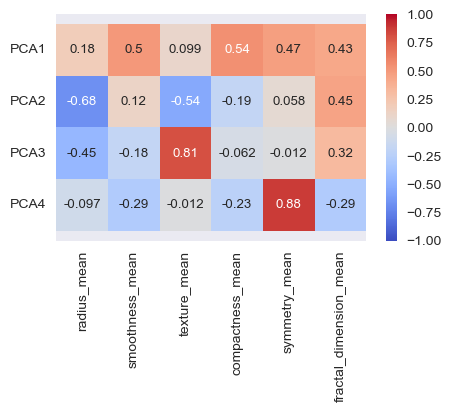

In [61]:
#view the strength of each feature onto the principal components
X_features = df3.drop(['diagnosis_enc'], axis=1)
X_feat_std = StandardScaler().fit_transform(X_features) 
pca = PCA(n_components=4)
x_new = pca.fit_transform(X_feat_std)
fig= plt.figure(figsize=(5,3),dpi=100)
ax = sns.heatmap(pca.components_,annot=True,cmap='coolwarm',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(X_features.columns),vmin=-1,vmax=1)
plt.yticks(rotation=0);
ax.axis('equal');plt.show()

In [62]:
#determine top 2 features for first two PCA components
nPCA = 2
X_features = df3.drop(['diagnosis_enc'], axis=1)
X_feat_std = StandardScaler().fit_transform(X_features) 
featureNames = X_features.columns
pca = PCA(n_components=nPCA).fit(X_feat_std)
X_pca = pca.transform(X_feat_std)
most_important = [np.abs(pca.components_[i]).argmax() for i in range(nPCA)]
most_important_names = [featureNames[most_important[i]] for i in range(nPCA)]
print(most_important_names)

['compactness_mean', 'radius_mean']


### Make our dataset.  
* target is the **diagnosis**

In [63]:
# our mean dataset
y = df3['diagnosis_enc']
X = df3.drop(['diagnosis_enc'], axis=1)
X_std = StandardScaler().fit_transform(X) 
# our 2 parameter dataset
col2 = ['compactness_mean', 'radius_mean']
X2 = df3[col2]
X2_std = StandardScaler().fit_transform(X2) 

### make our test/train/validate datasets

In [64]:
X_train, X_valid, y_train, y_valid     = train_test_split(X_std, y,test_size=0.3, random_state=325)
X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2_std, y,test_size=0.3, random_state=325)

We'll start with **k=1**.

## kNN

#### Plotting decision boundaries for 2 features

In [65]:
def predictCLFmap(X,clf,h=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return Z,xx,yy

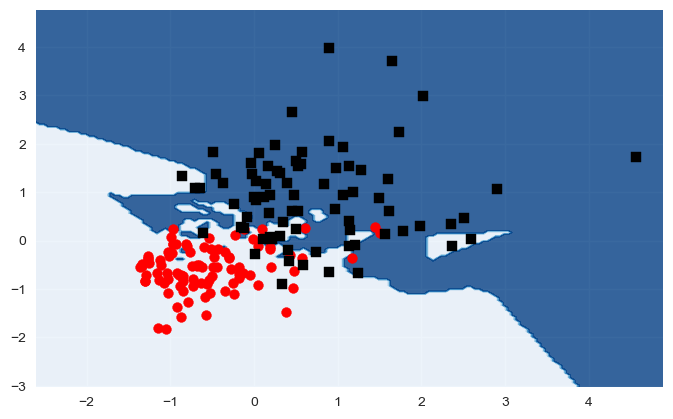

In [66]:
k_neighbors=1
knn2 = KNeighborsClassifier(k_neighbors)
knn2.fit(X2_train,y2_train)
Z,xx,yy = predictCLFmap(X2_train,knn2,h=0.05)
#plot
fig = plt.figure(figsize=(8.1,5),dpi=100);
plt.contourf(xx,yy,Z,cmap=plt.cm.Blues, alpha=0.8)
col = ['r','k']
markers = ['o', 's']
for i in range(2): #2 clusters
    iny = y_valid==i
    plt.scatter(X2_valid[iny, 0], X2_valid[iny, 1], color=col[i],marker=markers[i],s=50);
plt.show()

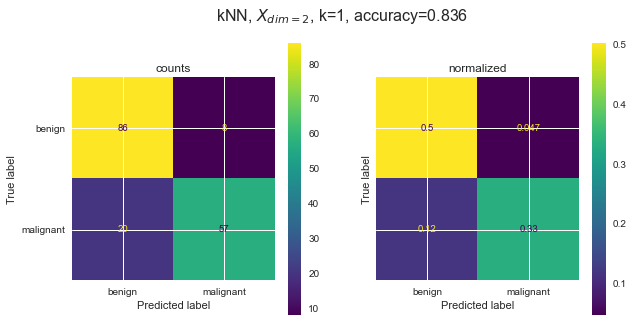

In [67]:
y_pred = knn2.predict(X2_valid)
cm = confusion_matrix(y2_valid, y_pred)
acc = accuracy_score(y2_valid, y_pred)
#plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey='row')
cmd = ConfusionMatrixDisplay(cm, display_labels=['benign','malignant']) #1 = M, 0 = B
cmd.plot(ax=axes[0])
axes[0].set_title('counts')
cmd = ConfusionMatrixDisplay(cm/np.sum(cm[:]),display_labels=['benign','malignant']) #1 = M, 0 = B
cmd.plot(ax=axes[1])
axes[1].set_title('normalized')
fig.suptitle('kNN, $X_{dim=2}$, k=1, accuracy=%2.3f'%(acc), fontsize=16);

## Cross-validate to find best k
Using **gridsearchCV**
Allows you to define a grid of parameters that will be searched using K-fold cross-validation

In [68]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, verbose = 0, cv=3, scoring='accuracy');
grid.fit(X2_train, y2_train);
#
print('kNN best param = ',grid.best_params_)
kscoreM = grid.cv_results_['mean_test_score']
kscoreS = grid.cv_results_['std_test_score']
knnBest = grid.best_estimator_
k_cv = grid.best_params_['n_neighbors']

kNN best param =  {'n_neighbors': 29}


how does knn do on our test dataset?

**Result Visualisation**

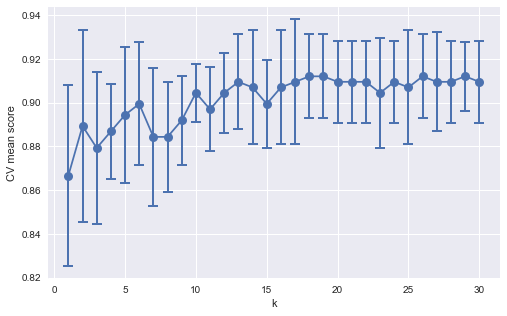

In [69]:
plt.figure(figsize = (8.1,5))
plt.errorbar(k_range,kscoreM,kscoreS,marker='o',label='Train Score',capsize=5, elinewidth=2, markeredgewidth=2)
plt.xlabel('k')
plt.ylabel('CV mean score')
plt.show()

#### Cross validation shows k=29 has the highest test score.

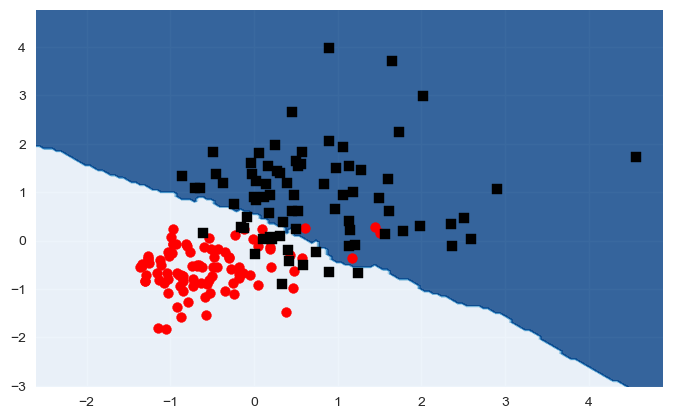

In [70]:
Z,xx,yy = predictCLFmap(X2_train,knnBest,h=0.05)
#plot
fig = plt.figure(figsize=(8.1,5),dpi=100);
plt.contourf(xx,yy,Z,cmap=plt.cm.Blues, alpha=0.8)
col = ['r','k']
markers = ['o', 's']
for i in range(2): #2 clusters
    iny = y_valid==i
    plt.scatter(X2_valid[iny, 0], X2_valid[iny, 1], color=col[i],marker=markers[i],s=50);
plt.show()

#### View the confusion matrix.

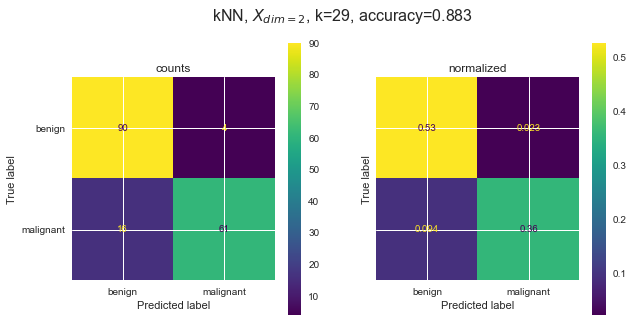

In [71]:
y_pred = knnBest.predict(X2_valid)
cm = confusion_matrix(y2_valid, y_pred)
acc = accuracy_score(y2_valid, y_pred)
#plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey='row')
cmd = ConfusionMatrixDisplay(cm, display_labels=['benign','malignant']) #1 = M, 0 = B
cmd.plot(ax=axes[0])
axes[0].set_title('counts')
cmd = ConfusionMatrixDisplay(cm/np.sum(cm[:]),display_labels=['benign','malignant']) #1 = M, 0 = B
cmd.plot(ax=axes[1])
axes[1].set_title('normalized')
fig.suptitle('kNN, $X_{dim=2}$, k=%d, accuracy=%2.3f'%(k_cv,acc), fontsize=16);

We have 90 true positives and 61 true negatives.  There are 20 misidentified test examples.

How to read:
* The diagonal elements show the number of correct classifications for each class.
* The off-diagonal elements provides the misclassifications: for example, 4 of the benign were misclassified as malignant.

### kNN with all 'mean' features

#### cross validate to find best k

In [72]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, verbose = 0, cv=3, scoring='accuracy');
grid.fit(X_train, y_train);
#
print('kNN best param = ',grid.best_params_)
kscoreM = grid.cv_results_['mean_test_score']
kscoreS = grid.cv_results_['std_test_score']
knnBest = grid.best_estimator_
k_cv = grid.best_params_['n_neighbors']

kNN best param =  {'n_neighbors': 9}


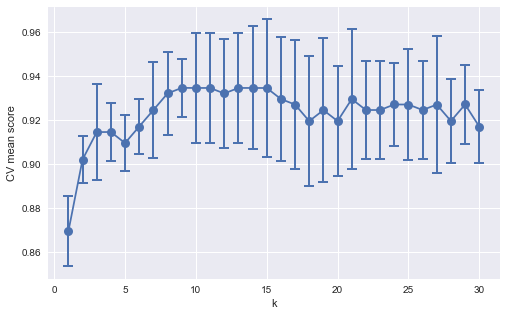

In [73]:
plt.figure(figsize = (8.1,5))
plt.errorbar(k_range,kscoreM,kscoreS,marker='o',label='Train Score',capsize=5, elinewidth=2, markeredgewidth=2)
plt.xlabel('k')
plt.ylabel('CV mean score')
plt.show()

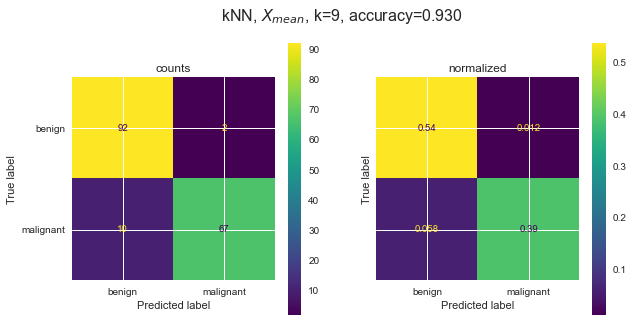

In [74]:
y_pred = knnBest.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
#plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey='row')
cmd = ConfusionMatrixDisplay(cm, display_labels=['benign','malignant']) #1 = M, 0 = B
cmd.plot(ax=axes[0])
axes[0].set_title('counts')
cmd = ConfusionMatrixDisplay(cm/np.sum(cm[:]),display_labels=['benign','malignant']) #1 = M, 0 = B
cmd.plot(ax=axes[1])
axes[1].set_title('normalized')
fig.suptitle('kNN, $X_{mean}$, k=%d, accuracy=%2.3f'%(k_cv,acc), fontsize=16);

There is a large improvement in the accuracy.

## SVM

Let's switch gears here to use an SVM.  

SVM training depends on dozens of parameters:

* C parameter - greater the missclassification penalty, slower the process
* kernel - more complicated the kernel, slower the process (rbf is the most complex from the predefined ones)
* data size/dimensionality - again, the same rule

We'll start with a small **C = 0.01**, and a linear kernel and our 

In [75]:
svc_model = SVC(kernel='linear', C=0.01)
svc_model.fit(X2_train, y2_train)

SVC(C=0.01, kernel='linear')

You can view the support vectors. We'll only view the first 5 here.

In [76]:
svc_model.support_vectors_[:5]

array([[ 0.96385359, -0.69222545],
       [-0.60855066,  0.77044766],
       [ 2.25444934,  0.03769103],
       [-1.02680981,  0.19389884],
       [ 0.56018708,  0.14561642]])

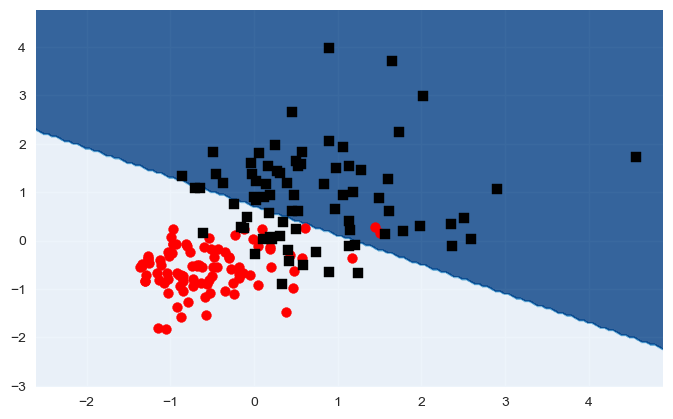

In [77]:
Z,xx,yy = predictCLFmap(X2_train,svc_model,h=0.05)
#plot
fig = plt.figure(figsize=(8.1,5),dpi=100);
plt.contourf(xx,yy,Z,cmap=plt.cm.Blues, alpha=0.8)
col = ['r','k']
markers = ['o', 's']
for i in range(2): #2 clusters
    iny = y_valid==i
    plt.scatter(X2_valid[iny, 0], X2_valid[iny, 1], color=col[i],marker=markers[i],s=50);
plt.show()

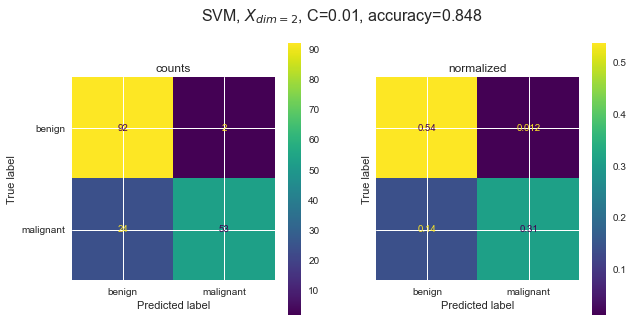

In [78]:
y_pred = svc_model.predict(X2_valid)
cm = confusion_matrix(y2_valid, y_pred)
acc = accuracy_score(y2_valid, y_pred)
#plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey='row')
cmd = ConfusionMatrixDisplay(cm, display_labels=['benign','malignant']) #1 = M, 0 = B
cmd.plot(ax=axes[0])
axes[0].set_title('counts')
cmd = ConfusionMatrixDisplay(cm/np.sum(cm[:]),display_labels=['benign','malignant']) #1 = M, 0 = B
cmd.plot(ax=axes[1])
axes[1].set_title('normalized')
fig.suptitle('SVM, $X_{dim=2}$, C=0.01, accuracy=%2.3f'%acc, fontsize=16);

### GridsearchCV

Use gridsearchCV to find the best C.

In [79]:
# defining parameter range 
param_grid = {'C': [0.01,0.02,0.05,0.07,0.08,0.1,0.2,0.5,0.9,1,10,20],               
              'kernel': ['linear']}  
grid = GridSearchCV(SVC(), param_grid, verbose = 0, cv=3, scoring='accuracy');
# fitting the model for grid search 
grid.fit(X2_train, y2_train);
svmBest = grid.best_estimator_
C_cv = grid.best_params_['C']
CscoreM = grid.cv_results_['mean_test_score']
CscoreS = grid.cv_results_['std_test_score']
svmBest = grid.best_estimator_
print(grid.best_estimator_) 


SVC(C=0.07, kernel='linear')


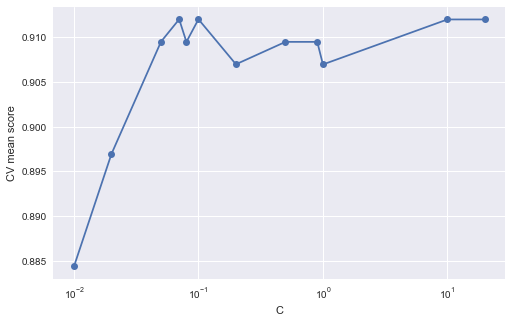

In [80]:
plt.figure(figsize = (8.1,5))
plt.plot(param_grid['C'],CscoreM,marker='o')
plt.xlabel('C')
plt.ylabel('CV mean score')
plt.xscale('log')
plt.show()

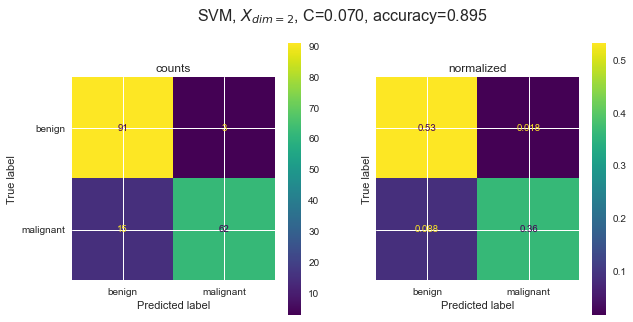

In [81]:
y_pred = svmBest.predict(X2_valid)
cm = confusion_matrix(y2_valid, y_pred)
acc = accuracy_score(y2_valid, y_pred)
#plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey='row')
cmd = ConfusionMatrixDisplay(cm, display_labels=['benign','malignant']) #1 = M, 0 = B
cmd.plot(ax=axes[0])
axes[0].set_title('counts')
cmd = ConfusionMatrixDisplay(cm/np.sum(cm[:]),display_labels=['benign','malignant']) #1 = M, 0 = B
cmd.plot(ax=axes[1])
axes[1].set_title('normalized')
fig.suptitle('SVM, $X_{dim=2}$, C=%3.3f, accuracy=%2.3f'%(C_cv,acc), fontsize=16);

Linear SVM is not bad, but not as good as the kNN.  Let's try to use a non-linear kernel, 'rbf'.

### Non-linear kernel, rbf.

RBF has two parameters
* C = softness parameter, regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared L2 penalty.
* $\gamma$, Kernel coefficient, smaller will be more linear

In [82]:
svc_modelRBG = SVC(kernel='rbf', C=1, gamma=0.01,random_state = 0)
svc_modelRBG.fit(X2_train, y2_train)

SVC(C=1, gamma=0.01, random_state=0)

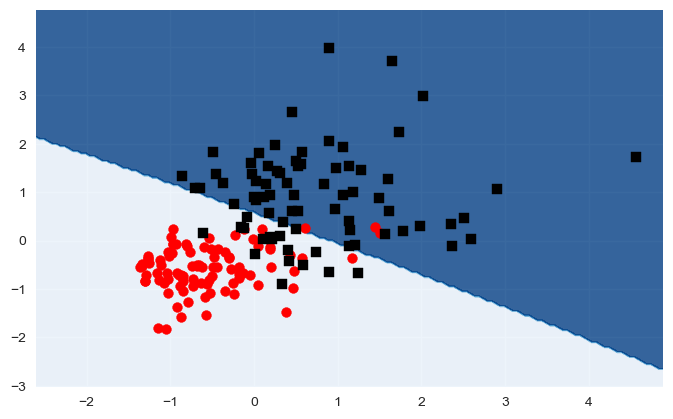

In [83]:
Z,xx,yy = predictCLFmap(X2_train,svc_modelRBG,h=0.05)
#plot
fig = plt.figure(figsize=(8.1,5),dpi=100);
plt.contourf(xx,yy,Z,cmap=plt.cm.Blues, alpha=0.8)
col = ['r','k']
markers = ['o', 's']
for i in range(2): #2 clusters
    iny = y_valid==i
    plt.scatter(X2_valid[iny, 0], X2_valid[iny, 1], color=col[i],marker=markers[i],s=50);
plt.show()

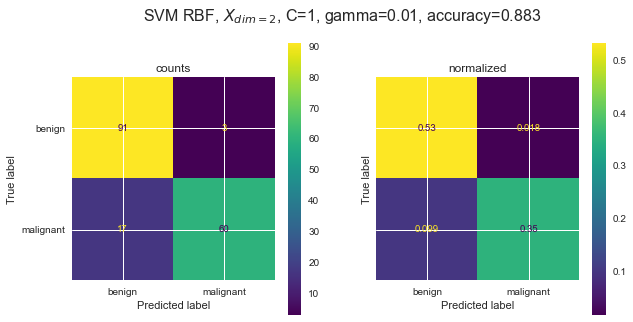

In [84]:
y_pred = svc_modelRBG.predict(X2_valid)
cm = confusion_matrix(y2_valid, y_pred)
acc = accuracy_score(y2_valid, y_pred)
#plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey='row')
cmd = ConfusionMatrixDisplay(cm, display_labels=['benign','malignant']) #1 = M, 0 = B
cmd.plot(ax=axes[0])
axes[0].set_title('counts')
cmd = ConfusionMatrixDisplay(cm/np.sum(cm[:]),display_labels=['benign','malignant']) #1 = M, 0 = B
cmd.plot(ax=axes[1])
axes[1].set_title('normalized')
fig.suptitle('SVM RBF, $X_{dim=2}$, C=1, gamma=0.01, accuracy=%2.3f'%(acc), fontsize=16);

### GridSearchCV

Here lets use GridSearchCV to help find the best parameters.

In [85]:
# defining parameter range 
param_grid = {'C': [0.01,0.02,0.05,0.07,0.08,0.1,0.2,0.5,0.9,1,10,20], 
              'gamma': [0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20],
              'kernel': ['rbf']}  
grid = GridSearchCV(SVC(), param_grid, verbose = 0, cv=3, scoring='accuracy');
# fitting the model for grid search 
grid.fit(X2_train, y2_train);
svmBest = grid.best_estimator_
C_cv = grid.best_params_['C']
gamma_cv = grid.best_params_['gamma']
print(grid.best_estimator_) 

SVC(C=0.1, gamma=0.2)


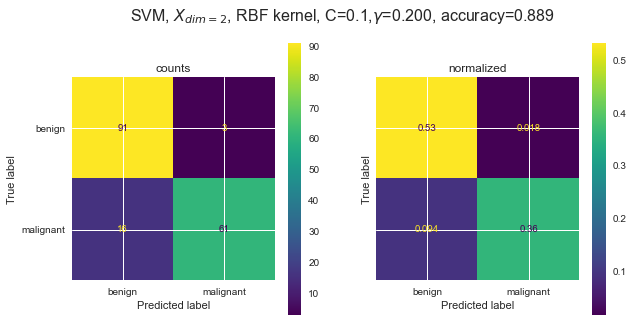

In [86]:
y_pred = svmBest.predict(X2_valid)
cm = confusion_matrix(y2_valid, y_pred)
acc = accuracy_score(y2_valid, y_pred)
#plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey='row')
cmd = ConfusionMatrixDisplay(cm, display_labels=['benign','malignant']) #1 = M, 0 = B
cmd.plot(ax=axes[0])
axes[0].set_title('counts')
cmd = ConfusionMatrixDisplay(cm/np.sum(cm[:]),display_labels=['benign','malignant']) #1 = M, 0 = B
cmd.plot(ax=axes[1])
axes[1].set_title('normalized')
fig.suptitle(r'SVM, $X_{dim=2}$, RBF kernel, C=%3.1f,$\gamma$=%3.3f, accuracy=%2.3f'%(C_cv,gamma_cv,acc), fontsize=16);

### SVM on 'mean' features

In [87]:
# defining parameter range 
param_grid = {'C': [0.01,0.02,0.05,0.07,0.08,0.1,0.2,0.5,0.9,1,10,20], 
              'gamma': [0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, verbose = 0, cv=3, scoring='accuracy');
# fitting the model for grid search 
grid.fit(X_train, y_train);
svmBest = grid.best_estimator_
C_cv = grid.best_params_['C']
gamma_cv = grid.best_params_['gamma']
print(grid.best_estimator_) 

SVC(C=10, gamma=0.02)


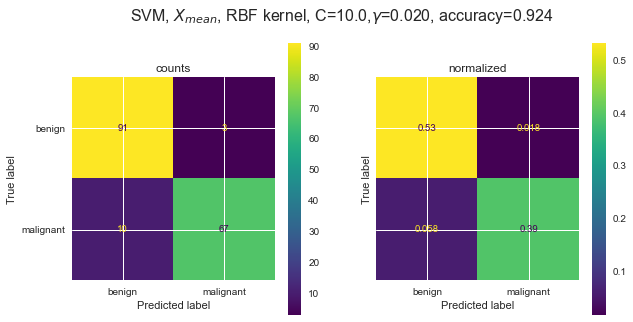

In [88]:
y_pred = svmBest.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
#plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey='row')
cmd = ConfusionMatrixDisplay(cm, display_labels=['benign','malignant']) #1 = M, 0 = B
cmd.plot(ax=axes[0])
axes[0].set_title('counts')
cmd = ConfusionMatrixDisplay(cm/np.sum(cm[:]),display_labels=['benign','malignant']) #1 = M, 0 = B
cmd.plot(ax=axes[1])
axes[1].set_title('normalized')
fig.suptitle(r'SVM, $X_{mean}$, RBF kernel, C=%3.1f,$\gamma$=%3.3f, accuracy=%2.3f'%(C_cv,gamma_cv,acc), fontsize=16);

## Naive Bayes Classifier

In [89]:
gnb = naive_bayes.GaussianNB()
gnb.fit(X2_train, y2_train)
y_pred = gnb.predict(X2_valid)

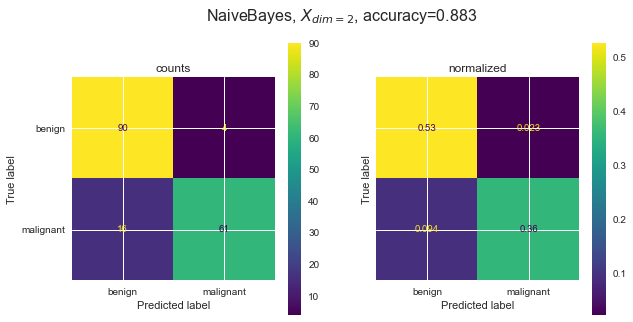

In [90]:
cm = confusion_matrix(y2_valid, y_pred)
acc = accuracy_score(y2_valid, y_pred)
#plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey='row')
cmd = ConfusionMatrixDisplay(cm, display_labels=['benign','malignant']) #1 = M, 0 = B
cmd.plot(ax=axes[0])
axes[0].set_title('counts')
cmd = ConfusionMatrixDisplay(cm/np.sum(cm[:]),display_labels=['benign','malignant']) #1 = M, 0 = B
cmd.plot(ax=axes[1])
axes[1].set_title('normalized')
fig.suptitle('NaiveBayes, $X_{dim=2}$, accuracy=%2.3f'%acc, fontsize=16);

In [91]:
print("Naive Bayes score: ",gnb.score(X2_valid, y2_valid))

Naive Bayes score:  0.8830409356725146


#### Naive Bayes with all the 'mean' features

In [92]:
gnb = naive_bayes.GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_valid)

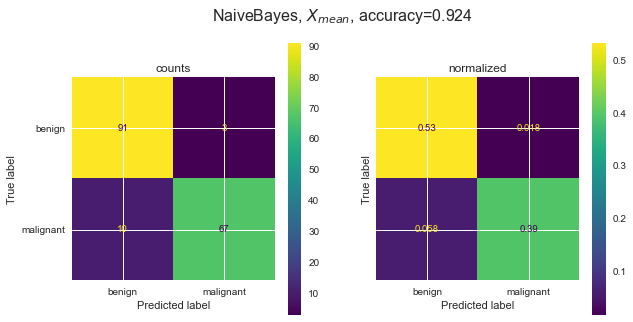

In [93]:
cm = confusion_matrix(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
#plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey='row')
cmd = ConfusionMatrixDisplay(cm, display_labels=['benign','malignant']) #1 = M, 0 = B
cmd.plot(ax=axes[0])
axes[0].set_title('counts')
cmd = ConfusionMatrixDisplay(cm/np.sum(cm[:]),display_labels=['benign','malignant']) #1 = M, 0 = B
cmd.plot(ax=axes[1])
axes[1].set_title('normalized')
fig.suptitle('NaiveBayes, $X_{mean}$, accuracy=%2.3f'%acc, fontsize=16);

In [94]:
print("Naive Bayes score: ",gnb.score(X_valid, y_valid))

Naive Bayes score:  0.9239766081871345


**Prediction for class of example i=10 and 30 in our validation set.**

In [95]:
i=10
print("%d: Class0=%4f, Class1=%4f"%(i,gnb.predict_proba(X_valid)[i][0],gnb.predict_proba(X_valid)[i][1]))
i=30
print("%d: Class0=%4f, Class1=%4f"%(i,gnb.predict_proba(X_valid)[i][0],gnb.predict_proba(X_valid)[i][1]))

10: Class0=0.008750, Class1=0.991250
30: Class0=0.884329, Class1=0.115671


## Summary

The best kNN and SVM performed similarly using the full dataset.  kNN outperformed all for the reduced set of features.

#### only 2 features
| model | accuracy |
| - | - |
| kNN k=1 | 0.836 |
| kNN k=29 | 0.883 |
| SVM C=0.01| 0.848 |
| SVM C=2| 0.895 |
| SVM RBF C=0.2, $\gamma$=0.1 | 0.889 |
| Naive-bayes | 0.883 |

#### all 'mean' features
| model | accuracy |
| - | - |
| kNN k=9 | 0.930 |
| SVM RBF C=10, $\gamma$=0.02 | 0.925 |
| Naive-bayes | 0.924 |